# Names

In [1]:
from prep_n_load import *
from nlp_helpers import tokenize_and_count

Sat Mar 26 14:33:11 2022  UTC
7351 parcels loaded.


## Ratio of parcels without a name

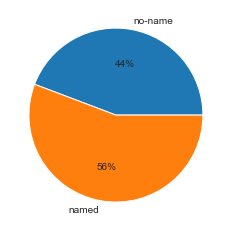

In [2]:
nonameratio = parcels[parcels.name.isna()].id.count() / parcels.shape[0]
_, ax = plt.subplots()
_ = ax.pie([nonameratio, 1 - nonameratio], labels=["no-name", "named"], autopct="%1.0f%%")


## Often used words in parcel names

In [6]:
from collections import Counter
all_names = (p["name"] for p in parcels_json if p["name"] and len(p["name"]) > 1)
c = Counter()
for name in all_names:
    c.update(tokenize_and_count(name))
print(counter_to_string(c, 50))

  482: gallery
  147: mf
  134: mvb
  119: art
   75: hq
   73: tower
   61: club
   56: nft
   55: satoshi
   48: pranksyland
   48: center
   47: house
   47: miami
   44: museum
   38: temple
   37: park
   31: bronx
   31: beach
   29: space
   29: garden
   28: studio
   28: blockchain
   28: sandbox
   27: metaverse
   27: shop
   27: dcl
   27: plazas
   26: mbc
   24: crypto
   24: vibes
   24: meta
   23: store
   23: tokyo
   22: group
   22: zonte
   21: exhibition
   20: neutron
   20: global
   20: solution
   20: collection
   20: plaza
   20: lounge
   20: paraverse
   20: north
   20: tomato
   19: teleport
   18: hub
   18: vox
   18: ii
   18: building


* MVB = Metaverse billboards
* MF = MetaFocus ("MetaFocus is a metaverse content dissemination service provider.")

## Top used words per island

In [5]:
for island_name, row in (
    parcels[~parcels.name.isna()]
    .groupby("island")["name"]
    .apply(" ".join)
    .to_frame()
    .iterrows()
):
    print(island_name)
    print(counter_to_string(tokenize_and_count(row["name"])))
    print()

Andromeda
   12: basement
   11: gallery
    6: vox
    6: netheryonder
    4: anno
    4: andromeda
    4: 中国华夏九州博物苑
    3: waterfront
    3: mnft
    3: club

Berlin
   23: gallery
   17: berlin
   10: m0na
    8: magall
    7: blockchain
    7: global
    7: solution
    7: group
    6: art
    6: ebc

Ceres
    7: ceres
    5: gallery
    4: wei
    4: lounge
    3: mezzanine
    3: synoptic
    2: pride
    2: voxel
    2: market
    2: tower

Electron
    5: electron
    3: paraverse
    2: hall
    1: pixls
    1: pride
    1: gallery
    1: vandao
    1: hq
    1: teleport
    1: mf

Euro
    6: euro
    4: tower
    3: portal
    2: gallery
    2: metaversatile
    2: studios
    2: zandihar
    2: vtg
    2: hub
    1: 212

Far Far Away
   12: school
   12: data
   12: science
    9: far
    5: away
    5: gallery
    2: uncle
    2: bitcoin
    2: shore
    2: ethereal

Fauna
    8: gallery
    6: peninsula
    6: bldg
    4: shadow
    4: monkey
    4: cabal
    3: fauna
  

* The people in Bronx sure like their island name.